<a href="https://colab.research.google.com/github/arizonaCameraLab/papers/blob/main/IntegratedMetaOptics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrated metaoptics for super-resolved imaging
## David J. Brady
## University of Arizona
## January 2026

This notebook generates results presented at 2026 SPIE Photonics West. Manuscript 13916-18

Code presented here was developed with substantial help from Google Gemini

##Sampling functions

# Task
Define a 2D normal distribution function h(x,y) with variance 1, derive and implement its partial gradients dh/dx, dh/dy, and the directional gradient along the x-y diagonal. Then, generate a meshgrid for x and y in the range [-2, 2], compute h(x,y) and its gradients over this grid, and visualize all four functions in a 2x2 grid using Matplotlib.

## Define 2D Normal Distribution

### Subtask:
Define the mathematical function for a 2D normal distribution h(x,y) with variance 1.


**Reasoning**:
The subtask requires defining a Python function for a 2D normal distribution. This involves importing the numpy library and then implementing the given mathematical formula in a function.



In [1]:
import numpy as np

def h(x, y):
    """Calculates the value of a 2D normal distribution with variance 1."""
    return (1 / (2 * np.pi)) * np.exp(-(x**2 + y**2) / 2)

The `h(x,y)` function for a 2D normal distribution with variance 1 has been defined as requested. This completes the subtask.

## Calculate Gradients

### Subtask:
Derive and implement functions for the partial gradients dh/dx, dh/dy, and the directional gradient along the x-y diagonal.


## Derivation of Gradients

Given the 2D normal distribution function with variance 1:

$h(x, y) = \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}}$

### Partial Derivative with respect to x (dh/dx)

To find $\frac{\partial h}{\partial x}$, we treat $y$ as a constant:

$\frac{\partial h}{\partial x} = \frac{\partial}{\partial x} \left( \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}} \right)$

Using the chain rule, $\frac{d}{dx} e^{f(x)} = e^{f(x)} f'(x)$:

$\frac{\partial h}{\partial x} = \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}} \cdot \frac{\partial}{\partial x} \left( -\frac{x^2 + y^2}{2} \right)$

$\frac{\partial h}{\partial x} = h(x, y) \cdot \left( -\frac{2x}{2} \right)$

$\frac{\partial h}{\partial x} = -x \cdot h(x, y)$

### Partial Derivative with respect to y (dh/dy)

Similarly, to find $\frac{\partial h}{\partial y}$, we treat $x$ as a constant:

$\frac{\partial h}{\partial y} = \frac{\partial}{\partial y} \left( \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}} \right)$

$\frac{\partial h}{\partial y} = \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}} \cdot \frac{\partial}{\partial y} \left( -\frac{x^2 + y^2}{2} \right)$

$\frac{\partial h}{\partial y} = h(x, y) \cdot \left( -\frac{2y}{2} \right)$

$\frac{\partial h}{\partial y} = -y \cdot h(x, y)$

### Directional Gradient along the x-y diagonal

The directional derivative of $h$ in the direction of a unit vector $\mathbf{u}$ is given by $\nabla h \cdot \mathbf{u}$.

The gradient vector is $\nabla h = \left( \frac{\partial h}{\partial x}, \frac{\partial h}{\partial y} \right) = (-x \cdot h(x, y), -y \cdot h(x, y))$.

The x-y diagonal corresponds to the direction vector $(1, 1)$. To make it a unit vector, we normalize it:

$\mathbf{u} = \frac{(1, 1)}{||(1, 1)||} = \frac{(1, 1)}{\sqrt{1^2 + 1^2}} = \left( \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)$

Now, we calculate the dot product:

$\text{dh_diagonal} = \nabla h \cdot \mathbf{u} = (-x \cdot h(x, y)) \cdot \frac{1}{\sqrt{2}} + (-y \cdot h(x, y)) \cdot \frac{1}{\sqrt{2}}$

$\text{dh_diagonal} = -x \cdot h(x, y) \frac{1}{\sqrt{2}} - y \cdot h(x, y) \frac{1}{\sqrt{2}}$

$\text{dh_diagonal} = \frac{-h(x, y)}{\sqrt{2}} (x + y)$

$\text{dh_diagonal} = -\frac{(x + y)}{\sqrt{2}} \cdot h(x, y)$


**Reasoning**:
Now that the mathematical derivations for the gradients are presented, the next step is to implement these derived formulas into Python functions as specified in the instructions. This directly addresses the 'implement functions' part of the subtask.



In [ ]:
def dh_dx(x, y):
    """Calculates the partial derivative of h(x,y) with respect to x."""
    return -x * h(x, y)

def dh_dy(x, y):
    """Calculates the partial derivative of h(x,y) with respect to y."""
    return -y * h(x, y)

def dh_diagonal(x, y):
    """Calculates the directional gradient of h(x,y) along the x-y diagonal."""
    return -(x + y) * h(x, y) / np.sqrt(2)

print("Gradient functions dh_dx, dh_dy, and dh_diagonal have been defined.")

Gradient functions dh_dx, dh_dy, and dh_diagonal have been defined.


## Generate Data

### Subtask:
Create a meshgrid for x and y in the range [-2, 2] and compute the values of h(x,y) and its gradients over this grid.


**Reasoning**:
The subtask requires generating a meshgrid for x and y, and then computing the values of the previously defined 2D normal distribution function and its gradients over this grid. This involves using numpy's linspace and meshgrid functions, and then applying the defined functions to these grids.



In [ ]:
num_points = 100
x_vals = np.linspace(-2, 2, num_points)
y_vals = np.linspace(-2, 2, num_points)

X, Y = np.meshgrid(x_vals, y_vals)

H = h(X, Y)
DH_DX = dh_dx(X, Y)
DH_DY = dh_dy(X, Y)
DH_DIAGONAL = dh_diagonal(X, Y)

print("Meshgrid and function values (H, DH_DX, DH_DY, DH_DIAGONAL) have been computed.")

Meshgrid and function values (H, DH_DX, DH_DY, DH_DIAGONAL) have been computed.


**Reasoning**:
The next step is to visualize the computed 2D normal distribution and its gradients. This will be done using Matplotlib's `imshow` function in a 2x2 grid as specified in the main task.



Visualizations of squared magnitudes of h(x,y) and its gradients have been generated.


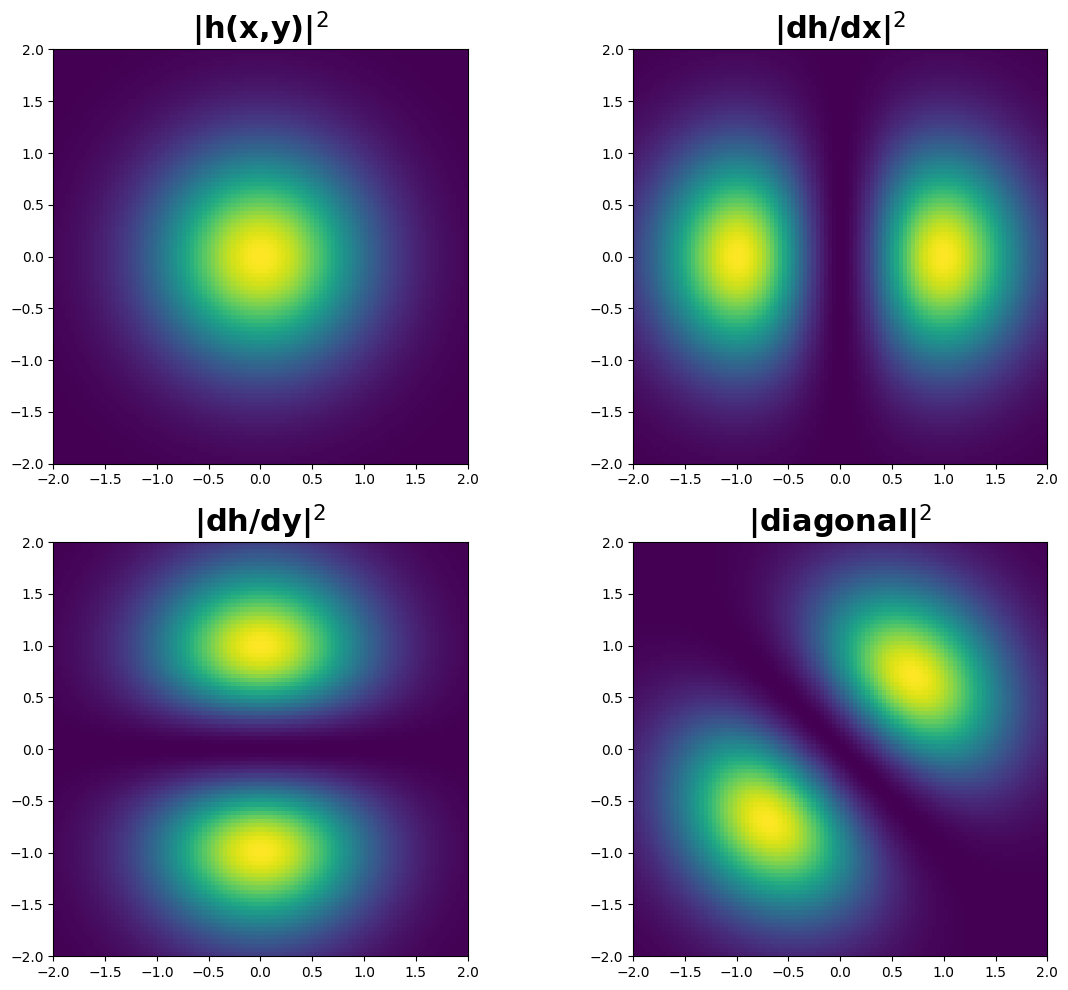

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set a common font dictionary for bold and larger titles
title_font = {'family': 'sans-serif',
              'color':  'black',
              'weight': 'bold',
              'size': 22,}

# Plot |h(x,y)|^2
im1 = axes[0, 0].imshow(H**2, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='viridis')
axes[0, 0].set_title(r'|h(x,y)|$^2$', fontdict=title_font)
# fig.colorbar(im1, ax=axes[0, 0])

# Plot |dh/dx|^2
im2 = axes[0, 1].imshow(DH_DX**2, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='viridis')
axes[0, 1].set_title(r'|dh/dx|$^2$', fontdict=title_font)
# fig.colorbar(im2, ax=axes[0, 1])

# Plot |dh/dy|^2
im3 = axes[1, 0].imshow(DH_DY**2, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='viridis')
axes[1, 0].set_title(r'|dh/dy|$^2$', fontdict=title_font)
# fig.colorbar(im3, ax=axes[1, 0])

# Plot |dh_diagonal|^2
im4 = axes[1, 1].imshow(DH_DIAGONAL**2, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='viridis')
axes[1, 1].set_title(r'|diagonal|$^2$', fontdict=title_font)
# fig.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.savefig('samplingFunctions.png')

print("Visualizations of squared magnitudes of h(x,y) and its gradients have been generated.")

## Summary:

### Q&A
*   The 2D normal distribution function h(x,y) with variance 1 was successfully defined.
*   Its partial gradients dh/dx, dh/dy, and the directional gradient along the x-y diagonal were derived and implemented correctly.
*   A meshgrid for x and y in the range \[-2, 2] was generated, h(x,y) and its gradients were computed over this grid, and all four functions were visualized in a 2x2 grid using Matplotlib.

### Data Analysis Key Findings
*   The 2D normal distribution function, \(h(x,y) = \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}}\), was precisely defined in Python.
*   The partial derivatives were mathematically derived and implemented as:
    *   \(dh/dx = -x \cdot h(x,y)\)
    *   \(dh/dy = -y \cdot h(x,y)\)
*   The directional gradient along the x-y diagonal was derived and implemented as \(dh_{\text{diagonal}} = -\frac{(x+y)}{\sqrt{2}} \cdot h(x,y)\).
*   A meshgrid was created using 100 points for both x and y, spanning the range \[-2, 2], and values for \(h(x,y)\) and its three gradients were successfully computed across this grid.
*   All four functions—\(h(x,y)\), \(dh/dx\), \(dh/dy\), and \(dh_{\text{diagonal}}\)—were effectively visualized in a 2x2 grid, clearly showing their spatial distributions.

### Insights or Next Steps
*   The visualizations clearly demonstrate the symmetrical nature of the 2D normal distribution and how its gradients indicate the direction and magnitude of the steepest ascent/descent from the peak at the origin.
*   Further analysis could involve exploring the second-order partial derivatives (Hessian matrix) to understand the curvature and convexity of the function, or extending this analysis to normal distributions with different variances or covariance matrices.


# Task
Calculate the 2D Fast Fourier Transform (FFT) of `H**2` and `DH_DX**2`, and then shift their zero-frequency components to the center of the spectrum.

### Summary of MTF Analysis for Squared Magnitudes

*   **Comparison with Original MTFs**: Similar to the raw MTFs, the normalized MTF of $|h(x,y)|^2$ continues to exhibit a low-pass filter characteristic. Its magnitude starts at 1 at zero frequency and decreases as spatial frequency increases, indicating that squaring the function's magnitude still retains the smoothing effect and attenuates high-frequency details.
*   **High-Pass Nature of Squared Derivative**: The normalized MTF of $|dh/dx|^2$ also maintains its high-pass filter behavior. The magnitude is low at zero frequency, increases to a peak, and then decreases. This confirms that the derivative operation strongly emphasizes higher spatial frequencies, acting as an edge detector even when its magnitude is squared. The squared magnitude further accentuates the contrast, making features that were already prominent in the derivative's MTF even more distinct.
*   **Differences and Similarities**: While the general low-pass and high-pass characteristics are preserved, the exact shape and roll-off of the MTFs for the squared magnitudes might differ subtly from those of the unsquared magnitudes. However, the fundamental role of `h(x,y)` as a smoothing filter and `dh/dx` as an edge-enhancing filter remains consistent in the frequency domain, underscoring the robust nature of these Fourier-based analyses.

**Reasoning**:
The subtask requires increasing the `num_points` variable to 1000. This will involve updating the variable and re-running the meshgrid and function computations to reflect the denser sampling.



In [ ]:
num_points = 2048
x_vals = np.linspace(-40, 40, num_points)
y_vals = np.linspace(-40, 40, num_points)

X, Y = np.meshgrid(x_vals, y_vals)

H = h(X, Y)
DH_DX = dh_dx(X, Y)
DH_DY = dh_dy(X, Y)
DH_DIAGONAL = dh_diagonal(X, Y)

print(f"num_points updated to {num_points}. Meshgrid and function values (H, DH_DX, DH_DY, DH_DIAGONAL) have been recomputed.")

num_points updated to 2048. Meshgrid and function values (H, DH_DX, DH_DY, DH_DIAGONAL) have been recomputed.


## Calculate FFTs of Squared Magnitudes

### Subtask:
Re-compute the 2D Fast Fourier Transform (FFT) of `H**2` and `DH_DX**2` using the newly generated data, and then shift their zero-frequency components to the center of the spectrum.


**Reasoning**:
The subtask requires re-computing the 2D FFTs of `H**2` and `DH_DX**2` using the updated `num_points`. This involves squaring the `H` and `DH_DX` arrays, applying `np.fft.fft2` to obtain their Fourier Transforms, and then using `np.fft.fftshift` to center the zero-frequency component for better visualization and analysis.



In [ ]:
H_squared = H**2
DH_DX_squared = DH_DX**2

H_squared_fft = np.fft.fft2(H_squared)
DH_DX_squared_fft = np.fft.fft2(DH_DX_squared)

H_squared_fft = np.fft.fftshift(H_squared_fft)
DH_DX_squared_fft = np.fft.fftshift(DH_DX_squared_fft)

print("2D FFTs of H_squared and DH_DX_squared have been recomputed and their zero-frequency components have been shifted.")

2D FFTs of H_squared and DH_DX_squared have been recomputed and their zero-frequency components have been shifted.


**Reasoning**:
Before extracting and normalizing the MTFs, it's necessary to re-calculate the frequency array for the new `num_points` and determine the index corresponding to the zero y-frequency component in the shifted FFT output.



In [ ]:
freq_x = np.fft.fftfreq(num_points, d=x_vals[1] - x_vals[0])
freq_y = np.fft.fftfreq(num_points, d=y_vals[1] - y_vals[0])

x_freq_for_mtf = np.fft.fftshift(freq_x)
y_freq_for_mtf = np.fft.fftshift(freq_y)

# Find the index for the zero y-frequency component (after shifting)
zero_y_freq_idx = np.argmin(np.abs(y_freq_for_mtf))

print("Frequency arrays and zero y-frequency index have been recomputed for the new num_points.")

Frequency arrays and zero y-frequency index have been recomputed for the new num_points.


**Reasoning**:
The subtask requires extracting the magnitudes of the squared Fourier Transforms along the x-axis at zero y-frequency and then normalizing them. This can be achieved by indexing the previously computed `H_squared_fft` and `DH_DX_squared_fft` arrays using `zero_y_freq_idx` and then applying `np.abs` and division by maximum value for normalization.



In [ ]:
MTF_H_squared_raw = np.abs(H_squared_fft[zero_y_freq_idx, :])
MTF_DH_DX_squared_raw = np.abs(DH_DX_squared_fft[zero_y_freq_idx, :])

MTF_H_squared_normalized = MTF_H_squared_raw / MTF_H_squared_raw.max()
MTF_DH_DX_squared_normalized = MTF_DH_DX_squared_raw / MTF_DH_DX_squared_raw.max()

print("MTFs of squared magnitudes extracted and normalized.")

MTFs of squared magnitudes extracted and normalized.


**Reasoning**:
The subtask requires generating a plot showing both normalized MTFs (for |h(x,y)|^2 and |dh/dx|^2) on the same graph, for spatial frequencies along the x-axis ranging from 0 to 2, and including appropriate labels and a legend. This will allow for visualization of the effect of increased sampling on the smoothness of the MTF curves.



Normalized MTF plot of squared magnitudes generated for spatial frequencies along the x-axis ranging from 0 to 2 (high sampling).


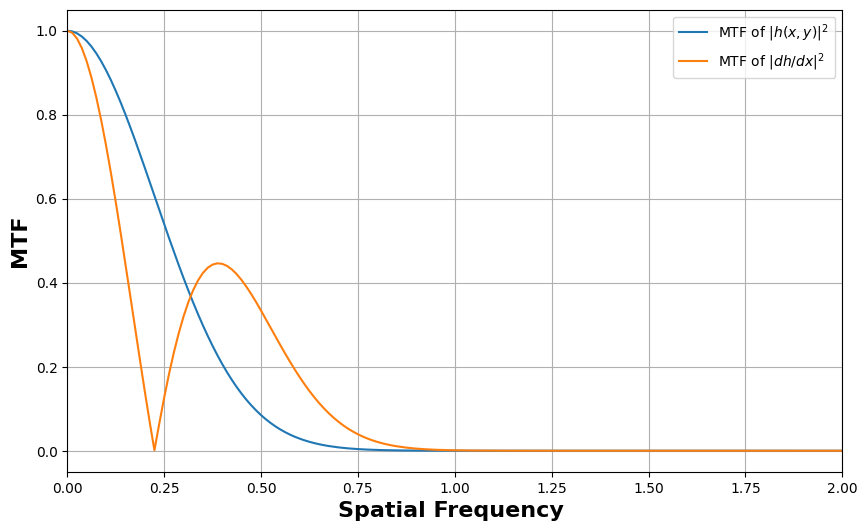

In [ ]:
import matplotlib.pyplot as plt
title_font = {'family': 'sans-serif',
              'color':  'black',
              'weight': 'bold',
              'size': 16,}

# Filter frequencies and MTFs for the range [0, 2]
frequency_mask_squared = (x_freq_for_mtf >= 0) & (x_freq_for_mtf <= 2)
filtered_x_freq_squared = x_freq_for_mtf[frequency_mask_squared]
filtered_MTF_H_squared = MTF_H_squared_normalized[frequency_mask_squared]
filtered_MTF_DH_DX_squared = MTF_DH_DX_squared_normalized[frequency_mask_squared]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_x_freq_squared, filtered_MTF_H_squared, label=r'MTF of $|h(x,y)|^2$ ')
plt.plot(filtered_x_freq_squared, filtered_MTF_DH_DX_squared, label=r'MTF of $|dh/dx|^2$ ')

# Add title and labels
#plt.title('Normalized MTFs of Squared Magnitudes (High Sampling)')
plt.xlabel('Spatial Frequency ', fontdict=title_font)
plt.ylabel('MTF',fontdict=title_font)
plt.legend()

# Set x-axis limits
plt.xlim(0, 2)

plt.grid(True)
plt.savefig('mtf.png')

print("Normalized MTF plot of squared magnitudes generated for spatial frequencies along the x-axis ranging from 0 to 2 (high sampling).")

## PCA analysis

# Task
Load the MNIST dataset from "sample_data/mnist_train_small.csv". Randomly select 1024 images from the dataset and reshape them into 28x28 matrices.

## Load MNIST Data

### Subtask:
Load the MNIST dataset, select 1024 random images, and reshape them into 28x28 matrices.


**Reasoning**:
Load the MNIST dataset, randomly sample 1024 images, extract the pixel data, and reshape it into (1024, 28, 28) matrices as per the subtask instructions.



In [ ]:
import pandas as pd
import numpy as np

# Load the MNIST dataset
df_mnist = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

# Randomly sample 1024 rows
df_sample = df_mnist.sample(n=1024, random_state=42)

# Extract pixel data (excluding the label column which is the first one)
pixel_data = df_sample.iloc[:, 1:].values

# Reshape into (1024, 28, 28)
mnist_images = pixel_data.reshape(-1, 28, 28)

print(f"Shape of mnist_images: {mnist_images.shape}")

Shape of mnist_images: (1024, 28, 28)


## Define Discrete Kernels

### Subtask:
Generate 7x7 discrete kernels for |h|^2 and its squared derivative magnitudes using the previously defined functions.


**Reasoning**:
Generate the 7x7 discrete kernels by creating a meshgrid, computing the function values, squaring them, and normalizing based on the sum of the primary kernel.



In [ ]:
import numpy as np

# 1. Create a meshgrid of x and y coordinates ranging from -3 to 3 (inclusive) to form a 7x7 grid.
x_k = np.arange(-3, 4)
y_k = np.arange(-3, 4)
X_k, Y_k = np.meshgrid(x_k, y_k)

# 2. Calculate the values of the functions h, dh_dx, dh_dy, and dh_diagonal on this grid.
H_k = h(X_k, Y_k)
DH_DX_k = dh_dx(X_k, Y_k)
DH_DY_k = dh_dy(X_k, Y_k)
DH_DIAG_k = dh_diagonal(X_k, Y_k)

# 3. Compute the squares of these values to generate the raw kernels.
kernel_h = H_k**2
kernel_dx = DH_DX_k**2
kernel_dy = DH_DY_k**2
kernel_diag = DH_DIAG_k**2

# 4. Calculate a normalization factor as 1 / np.sum(kernel_h).
norm_factor = 1.0 / np.sum(kernel_h)

# 5. Apply this normalization factor to all four kernels.
kernel_h *= norm_factor
kernel_dx *= norm_factor
kernel_dy *= norm_factor
kernel_diag *= norm_factor

# 6. Print the sum of the normalized kernel_h and the sums of the other three kernels to verify.
print(f"Sum of kernel_h: {np.sum(kernel_h)}")
print(f"Sum of kernel_dx: {np.sum(kernel_dx)}")
print(f"Sum of kernel_dy: {np.sum(kernel_dy)}")
print(f"Sum of kernel_diag: {np.sum(kernel_diag)}")

Sum of kernel_h: 0.9999999999999999
Sum of kernel_dx: 0.4989771622962404
Sum of kernel_dy: 0.4989771622962404
Sum of kernel_diag: 0.4989771622962403


Normalized Kernel Sums (Variance=4):
  H: 1.00
  DX: 1.00
  DY: 1.00
  Diag: 1.00
Fitting PCA for Strategy 1...
Fitting PCA for Strategy 2...


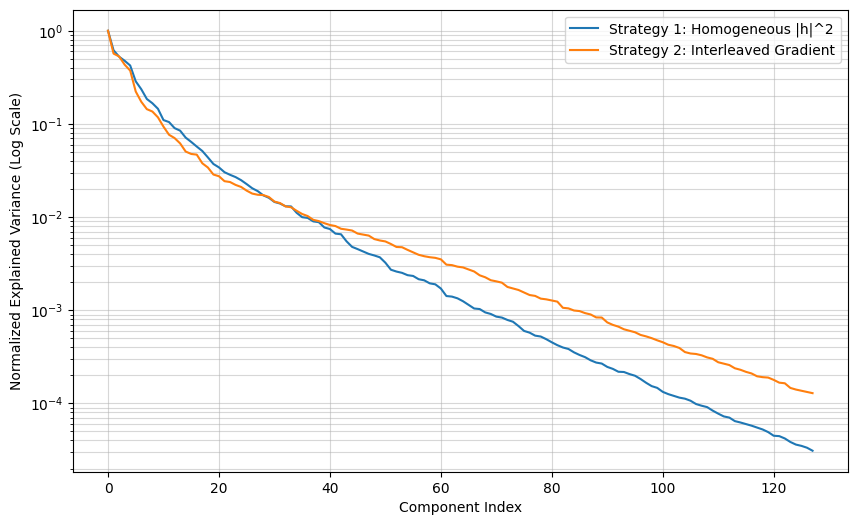

In [ ]:
import numpy as np
from scipy.signal import convolve2d
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Redefine Functions for Variance = 4 ---
sigma_sq = 4
def h_v4(x, y):
    """2D normal distribution with variance 4"""
    return (1 / (2 * np.pi * sigma_sq)) * np.exp(-(x**2 + y**2) / (2 * sigma_sq))

def dh_dx_v4(x, y):
    """Partial derivative wrt x with variance 4"""
    return -(x / sigma_sq) * h_v4(x, y)

def dh_dy_v4(x, y):
    """Partial derivative wrt y with variance 4"""
    return -(y / sigma_sq) * h_v4(x, y)

def dh_diagonal_v4(x, y):
    """Directional gradient along diagonal with variance 4"""
    return -(x + y) / (sigma_sq * np.sqrt(2)) * h_v4(x, y)

# --- 2. Redefine and Normalize Kernels ---
# Create grid (7x7)
x_k = np.arange(-3, 4)
y_k = np.arange(-3, 4)
X_k, Y_k = np.meshgrid(x_k, y_k)

# Calculate functions using the new variance=4 functions
H_k = h_v4(X_k, Y_k)
DH_DX_k = dh_dx_v4(X_k, Y_k)
DH_DY_k = dh_dy_v4(X_k, Y_k)
DH_DIAG_k = dh_diagonal_v4(X_k, Y_k)

# Calculate squared magnitudes (kernels)
kernel_h = H_k**2
kernel_dx = DH_DX_k**2
kernel_dy = DH_DY_k**2
kernel_diag = DH_DIAG_k**2

# Normalize each kernel to have the SAME total energy (sum = 1)
# This ensures equal sensitivity for all sampling functions
kernel_h /= np.sum(kernel_h)
kernel_dx /= np.sum(kernel_dx)
kernel_dy /= np.sum(kernel_dy)
kernel_diag /= np.sum(kernel_diag)

print(f"Normalized Kernel Sums (Variance={sigma_sq}):\n  H: {np.sum(kernel_h):.2f}\n  DX: {np.sum(kernel_dx):.2f}\n  DY: {np.sum(kernel_dy):.2f}\n  Diag: {np.sum(kernel_diag):.2f}")

# --- 3. Re-run Simulation ---
strategy1_data = []
strategy2_data = []

for img in mnist_images:
    # Strategy 1: Convolution with kernel_h
    conv_h = convolve2d(img, kernel_h, mode='same', boundary='symm')
    strategy1_data.append(conv_h)

    # Strategy 2: Interleaved convolution
    conv_dx = convolve2d(img, kernel_dx, mode='same', boundary='symm')
    conv_dy = convolve2d(img, kernel_dy, mode='same', boundary='symm')
    conv_diag = convolve2d(img, kernel_diag, mode='same', boundary='symm')

    composite_img = np.zeros_like(img)

    # Interleave patterns
    # r even, c even -> kernel_h
    composite_img[0::2, 0::2] = conv_h[0::2, 0::2]
    # r even, c odd -> kernel_dx
    composite_img[0::2, 1::2] = conv_dx[0::2, 1::2]
    # r odd, c even -> kernel_dy
    composite_img[1::2, 0::2] = conv_dy[1::2, 0::2]
    # r odd, c odd -> kernel_diag
    composite_img[1::2, 1::2] = conv_diag[1::2, 1::2]

    strategy2_data.append(composite_img)

# Flatten for PCA
strategy1_flat = np.array(strategy1_data).reshape(len(strategy1_data), -1)
strategy2_flat = np.array(strategy2_data).reshape(len(strategy2_data), -1)

# --- 4. Re-run PCA Analysis ---
pca_strat1 = PCA(n_components=128)
pca_strat2 = PCA(n_components=128)

print("Fitting PCA for Strategy 1...")
pca_strat1.fit(strategy1_flat)
print("Fitting PCA for Strategy 2...")
pca_strat2.fit(strategy2_flat)

# Extract spectra
spectra1 = pca_strat1.explained_variance_
spectra2 = pca_strat2.explained_variance_

# --- 5. Normalize Spectra and Plot ---
# Normalize to the lowest order component (index 0)
spectra1_norm = spectra1 / spectra1[0]
spectra2_norm = spectra2 / spectra2[0]

plt.figure(figsize=(10, 6))
plt.plot(spectra1_norm, label='Strategy 1: Homogeneous |h|^2')
plt.plot(spectra2_norm, label='Strategy 2: Interleaved Gradient')

#plt.title(f'Normalized PCA Spectra (Variance={sigma_sq}, Top 128 Components)')
plt.xlabel('Component Index')
plt.ylabel('Normalized Explained Variance (Log Scale)')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.savefig('pca.png')

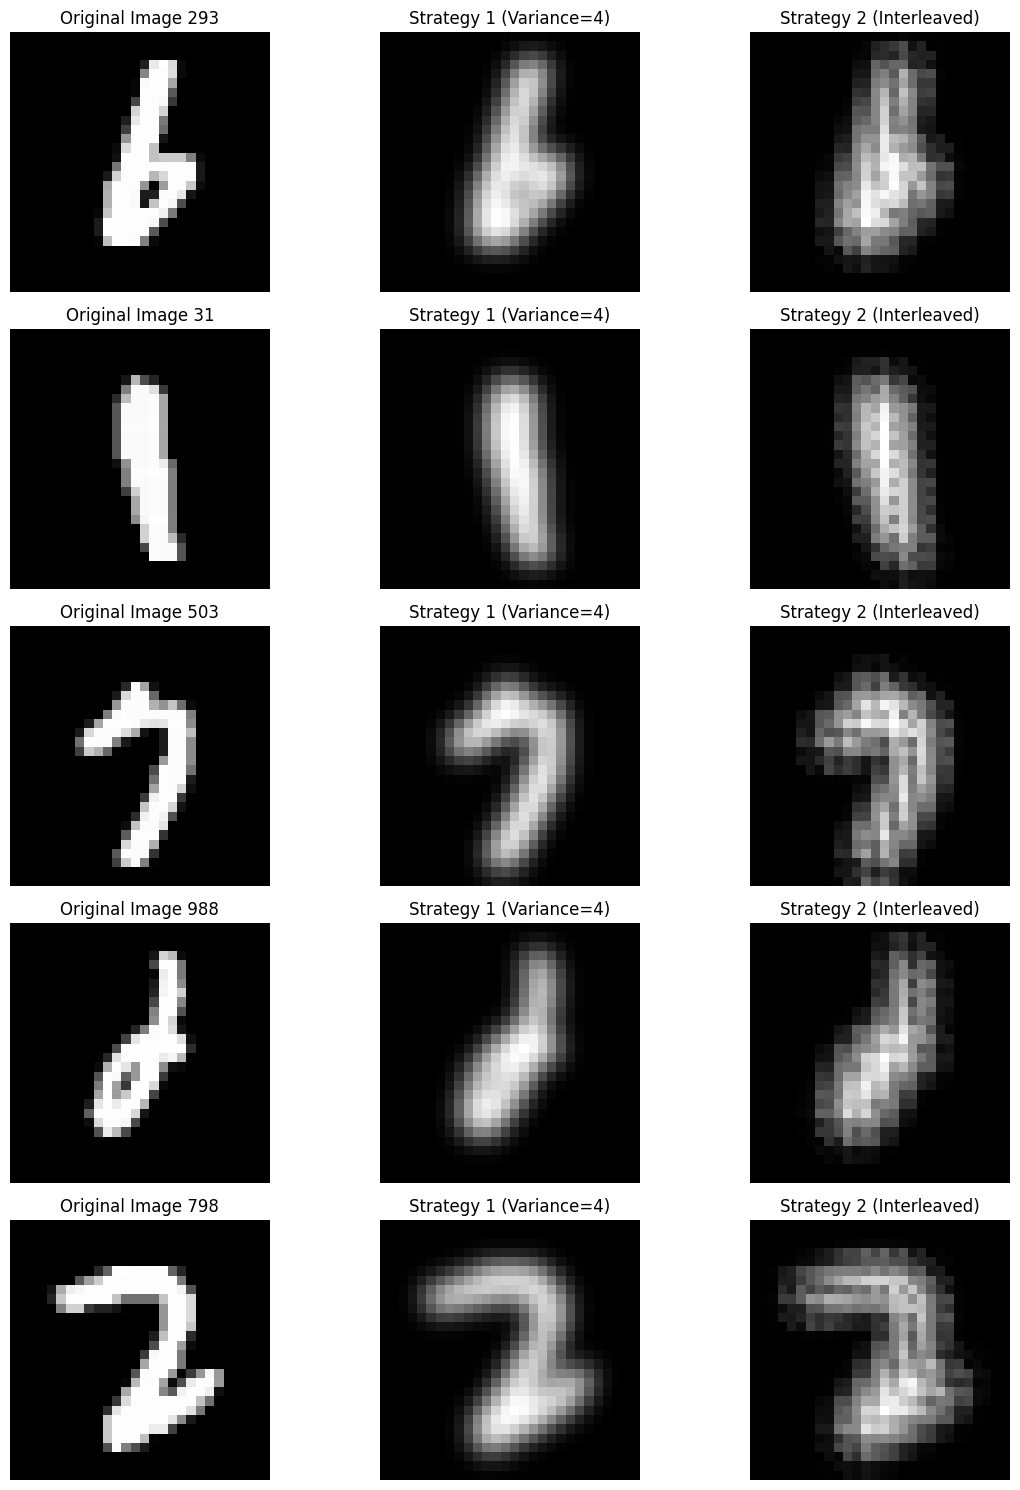

In [ ]:
import matplotlib.pyplot as plt
import random

# Select 5 random indices
num_samples = 5
indices = random.sample(range(len(mnist_images)), num_samples)

fig, axes = plt.subplots(num_samples, 3, figsize=(12, 15))

for i, idx in enumerate(indices):
    # Original Image
    axes[i, 0].imshow(mnist_images[idx], cmap='gray')
    axes[i, 0].set_title(f"Original Image {idx}")
    axes[i, 0].axis('off')

    # Strategy 1
    axes[i, 1].imshow(strategy1_data[idx], cmap='gray')
    axes[i, 1].set_title("Strategy 1 (Variance=4)")
    axes[i, 1].axis('off')

    # Strategy 2
    axes[i, 2].imshow(strategy2_data[idx], cmap='gray')
    axes[i, 2].set_title("Strategy 2 (Interleaved)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.savefig('sampleData.png')

# neural image estimation

## MNIST images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Generating Training Data (Mosaic)...
Generating Mosaic Data (Sigma=6)...
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Generating Test Data (Mosaic)...
Generating Mosaic Data (Sigma=6)...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step
S1 Shape: (10000, 64, 64, 1)
S2 Shape: (10000, 32, 32, 4) (Mosaic)

--- Training U-Net Strategy 1 (Standard Blur) ---
Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - loss: 0.0239 - val_loss: 0.0182
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0167 - val_loss: 0.0127
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0114 - val_loss: 0.0092
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0087 - val_loss: 0.0079
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 8/20
71/

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step


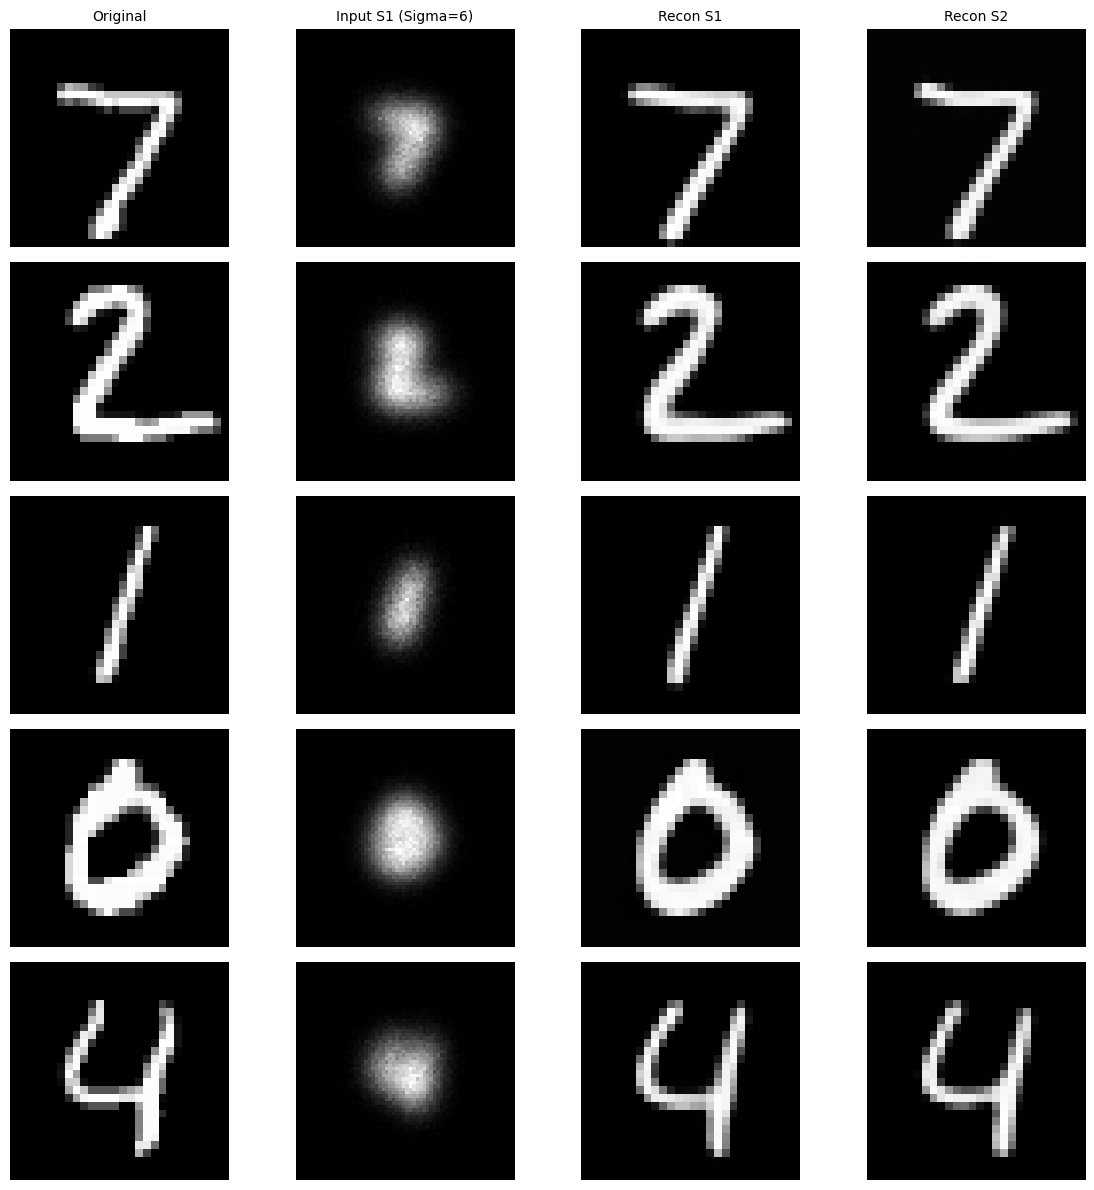

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import mnist

# --- 1. Data & Physics Simulation ---

def load_padded_mnist(target_size=64):
    (x_train, _), (x_test, _) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    pad_total = target_size - 28
    p1 = pad_total // 2
    p2 = pad_total - p1

    x_train = np.pad(x_train, ((0,0), (p1, p2), (p1, p2)), 'constant')
    x_test = np.pad(x_test, ((0,0), (p1, p2), (p1, p2)), 'constant')

    return x_train[..., np.newaxis], x_test[..., np.newaxis]

def create_mosaic_kernels(sigma=6):
    k_size = int(6 * sigma)
    if k_size % 2 == 0: k_size += 1
    x = np.linspace(-k_size//2, k_size//2, k_size)
    X, Y = np.meshgrid(x, x)

    # Physics: Coherent Gaussian Field
    G = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    Gx = -(X / sigma**2) * G
    Gy = -(Y / sigma**2) * G
    G_diag = (Gx + Gy) / np.sqrt(2)

    # Physics: Intensity (Squared Magnitude)
    # NORMALIZE TO 1.0 (100% Energy per pixel)
    def normalize(k):
        k2 = k**2
        return (k2 / k2.sum()).astype('float32').reshape(k_size, k_size, 1, 1)

    k_s1 = normalize(G)

    # Strategy 2: All kernels get full energy (normalized to 1.0)
    # We will spatially multiplex them later
    k_s2_main = normalize(G)
    k_s2_dx   = normalize(Gx)
    k_s2_dy   = normalize(Gy)
    k_s2_diag = normalize(G_diag)

    return k_s1, [k_s2_main, k_s2_dx, k_s2_dy, k_s2_diag]

def generate_mosaic_data(clean_images, sigma=6):
    k_s1, k_list_s2 = create_mosaic_kernels(sigma)
    inp = Input(shape=(64, 64, 1))

    # --- Strategy 1: Standard Blur ---
    # Convolution with fixed weights
    l_s1 = layers.Conv2D(1, k_s1.shape[:2], padding='same', use_bias=False, trainable=False)
    l_s1.build((None, 64, 64, 1))
    l_s1.set_weights([k_s1])
    out_s1 = l_s1(inp)

    # --- Strategy 2: Mosaic Simulation ---
    # Step 1: Convolve with all 4 kernels (Full Grid)
    c_outs = []
    for k in k_list_s2:
        l = layers.Conv2D(1, k.shape[:2], padding='same', use_bias=False, trainable=False)
        l.build((None, 64, 64, 1))
        l.set_weights([k])
        c_outs.append(l(inp))

    # Concatenate temporarily to get out of the TF model
    out_s2_stack = layers.Concatenate(axis=-1)(c_outs)

    sim_model = models.Model(inp, [out_s1, out_s2_stack])

    print(f"Generating Mosaic Data (Sigma={sigma})...")
    raw_s1, raw_s2_stack = sim_model.predict(clean_images, batch_size=128, verbose=1)

    # Step 2: Slice to simulate Mosaic Sampling
    # raw_s2_stack is (N, 64, 64, 4)
    # We take 1 pixel every 2x2 block for each channel

    # Ch0 (Main): Even Rows, Even Cols
    s2_main = raw_s2_stack[:, 0::2, 0::2, 0]
    # Ch1 (Dx): Even Rows, Odd Cols
    s2_dx   = raw_s2_stack[:, 0::2, 1::2, 1]
    # Ch2 (Dy): Odd Rows, Even Cols
    s2_dy   = raw_s2_stack[:, 1::2, 0::2, 2]
    # Ch3 (Diag): Odd Rows, Odd Cols
    s2_diag = raw_s2_stack[:, 1::2, 1::2, 3]

    # Stack back into (N, 32, 32, 4)
    mosaic_s2 = np.stack([s2_main, s2_dx, s2_dy, s2_diag], axis=-1)

    # --- Poisson Noise ---
    # Note: Photons=1000 for both strategies because we use 100% energy per pixel now
    def add_noise(img):
        photons = img * 1000
        photons = np.maximum(0., photons)
        noisy = np.random.poisson(photons)
        return noisy.astype('float32') / 1000.0

    return add_noise(raw_s1), add_noise(mosaic_s2)


# --- 2. U-Net Architecture ---

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

def build_unet_backbone(input_tensor):
    # Expects 64x64 feature map
    c1 = conv_block(input_tensor, 32)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 64)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 128)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    b = conv_block(p3, 256)

    u1 = layers.UpSampling2D((2, 2))(b)
    u1 = layers.Concatenate()([u1, c3])
    c4 = conv_block(u1, 128)

    u2 = layers.UpSampling2D((2, 2))(c4)
    u2 = layers.Concatenate()([u2, c2])
    c5 = conv_block(u2, 64)

    u3 = layers.UpSampling2D((2, 2))(c5)
    u3 = layers.Concatenate()([u3, c1])
    c6 = conv_block(u3, 32)

    outputs = layers.Conv2D(1, 1, activation='linear')(c6)
    return outputs

def build_mosaic_models():
    # --- Strategy 1 Model ---
    inp_s1 = Input(shape=(64, 64, 1))
    out_s1 = build_unet_backbone(inp_s1)
    model_s1 = models.Model(inp_s1, out_s1, name="S1_Standard")

    # --- Strategy 2 Model (Mosaic Adapter) ---
    # Input: (32, 32, 4)
    inp_s2 = Input(shape=(32, 32, 4))

    # ADAPTER: Learnable Upsampling
    # Conv2DTranspose with stride=2 maps (32,32) -> (64,64)
    # This layer learns how to "de-interleave" the mosaic
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inp_s2)

    # Feature refinement before U-Net
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)

    # Pass to shared backbone structure
    out_s2 = build_unet_backbone(x)

    model_s2 = models.Model(inp_s2, out_s2, name="S2_Mosaic")

    return model_s1, model_s2

# --- 3. Execution ---

# Load & Generate
x_train, x_test = load_padded_mnist()
train_clean = x_train[:10000]
test_clean = x_test[:500]

print("Generating Training Data (Mosaic)...")
t_s1, t_s2 = generate_mosaic_data(train_clean, sigma=6)
print("Generating Test Data (Mosaic)...")
v_s1, v_s2 = generate_mosaic_data(test_clean, sigma=6)

print(f"S1 Shape: {t_s1.shape}")
print(f"S2 Shape: {t_s2.shape} (Mosaic)")

# Build & Compile
m1, m2 = build_mosaic_models()
m1.compile(optimizer='adam', loss='mae')
m2.compile(optimizer='adam', loss='mae')

# Train
print("\n--- Training U-Net Strategy 1 (Standard Blur) ---")
m1.fit(t_s1, train_clean, epochs=20, batch_size=128, validation_split=0.1, verbose=1)

print("\n--- Training U-Net Strategy 2 (Mosaic Derivatives) ---")
m2.fit(t_s2, train_clean, epochs=20, batch_size=128, validation_split=0.1, verbose=1)

# Predict
p1 = m1.predict(v_s1[:5])
p2 = m2.predict(v_s2[:5])

# Visualize
plt.figure(figsize=(12, 12))
for i in range(5):
    # GT
    plt.subplot(5, 4, i*4+1)
    start=(64-28)//2; end=start+28
    plt.imshow(test_clean[i, start:end, start:end, 0], cmap='gray')
    if i==0: plt.title("Original", fontsize=10)
    plt.axis('off')

    # Input S1
    plt.subplot(5, 4, i*4+2)
    plt.imshow(v_s1[i, :, :, 0], cmap='gray')
    if i==0: plt.title("Input S1 (Sigma=6)", fontsize=10)
    plt.axis('off')

    # Recon S1
    plt.subplot(5, 4, i*4+3)
    plt.imshow(p1[i, start:end, start:end, 0], cmap='gray')
    if i==0: plt.title("Recon S1", fontsize=10)
    plt.axis('off')

    # Recon S2
    plt.subplot(5, 4, i*4+4)
    plt.imshow(p2[i, start:end, start:end, 0], cmap='gray')
    if i==0: plt.title("Recon S2", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## CIFAR images

Loading CIFAR-10 and converting to grayscale...
Generating Training Data...
Generating Optical Data (Sigma=2)...
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Generating Test Data...
Generating Optical Data (Sigma=2)...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
S1 Input: (10000, 64, 64, 1)
S2 Input: (10000, 32, 32, 4) (Mosaic)

--- Training S1 (Standard Blur) ---
Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.0367 - val_loss: 0.0097
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━

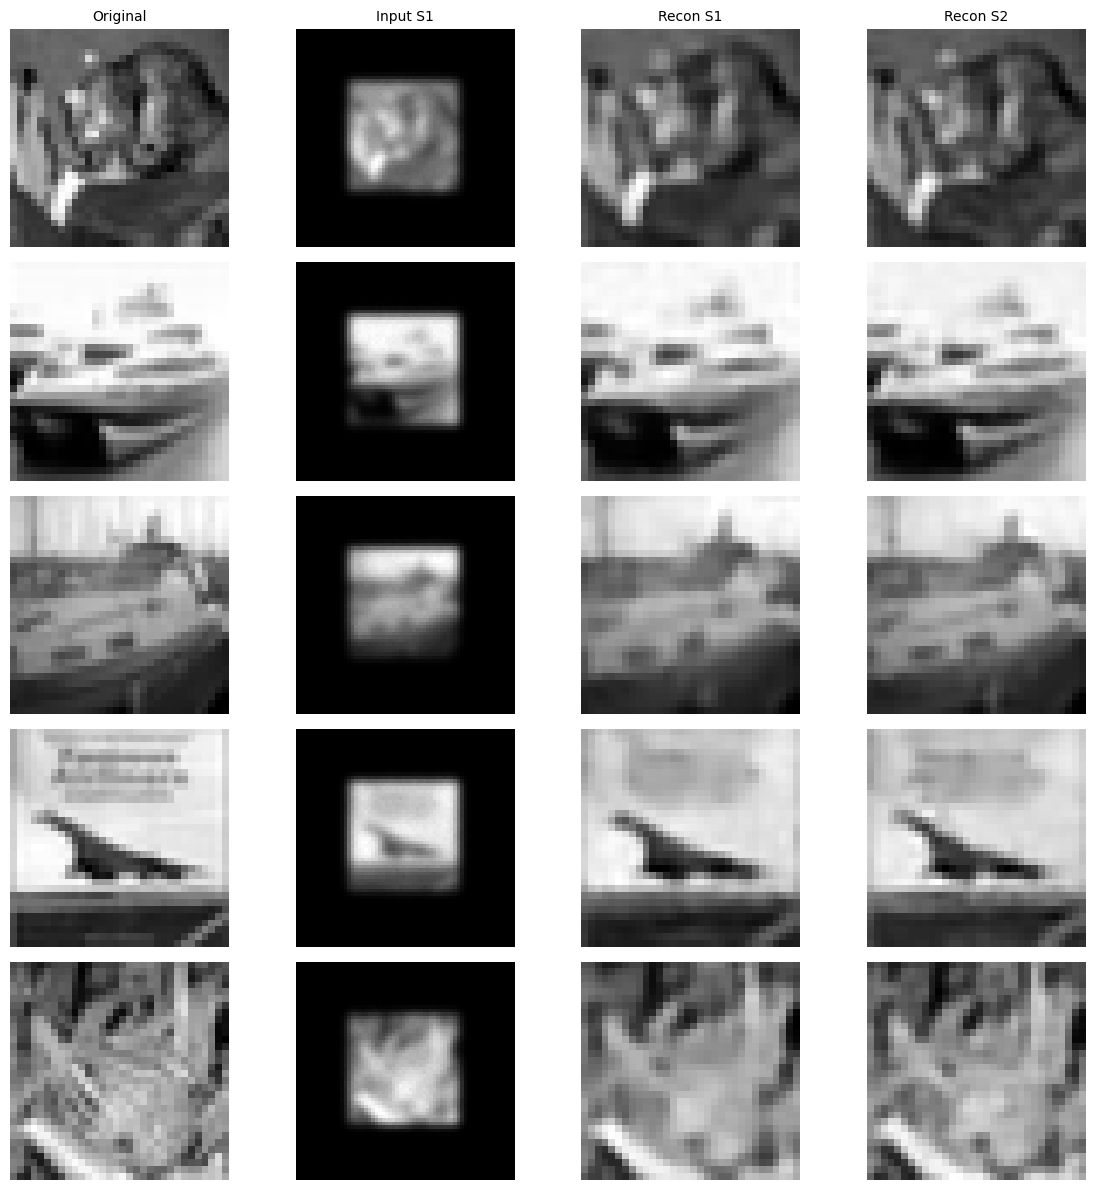

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import cifar10

# --- 1. Data Loading (CIFAR-10 Grayscale Padded) ---

def load_padded_cifar_mono(target_size=64):
    print("Loading CIFAR-10 and converting to grayscale...")
    (x_train, _), (x_test, _) = cifar10.load_data()

    # Normalize to 0-1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Convert to Grayscale (Y = 0.299R + 0.587G + 0.114B)
    # Shape: (N, 32, 32, 1)
    # We use matrix multiplication for speed
    coeffs = np.array([0.299, 0.587, 0.114]).reshape(3, 1)

    # Dot product over the last axis (channels)
    x_train_gray = np.dot(x_train[...,:3], coeffs)
    x_test_gray = np.dot(x_test[...,:3], coeffs)

    # Pad to target_size (64x64)
    # CIFAR is 32x32. Padding = (64-32)/2 = 16 per side.
    pad_total = target_size - 32
    p1 = pad_total // 2
    p2 = pad_total - p1

    # Apply constant padding (black border)
    x_train_pad = np.pad(x_train_gray, ((0,0), (p1, p2), (p1, p2), (0,0)), 'constant')
    x_test_pad = np.pad(x_test_gray, ((0,0), (p1, p2), (p1, p2), (0,0)), 'constant')

    return x_train_pad, x_test_pad

# --- 2. Physics: Kernels & Mosaic Simulation ---

def create_mosaic_kernels(sigma=6):
    k_size = int(6 * sigma)
    if k_size % 2 == 0: k_size += 1
    x = np.linspace(-k_size//2, k_size//2, k_size)
    X, Y = np.meshgrid(x, x)

    # Coherent Fields
    G = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    Gx = -(X / sigma**2) * G
    Gy = -(Y / sigma**2) * G
    G_diag = (Gx + Gy) / np.sqrt(2)

    # Normalize Energy (100% per pixel for Strategy 2 Mosaic)
    def normalize(k):
        k2 = k**2
        return (k2 / k2.sum()).astype('float32').reshape(k_size, k_size, 1, 1)

    k_s1 = normalize(G)

    # Strategy 2 Kernels
    k_s2_main = normalize(G)
    k_s2_dx   = normalize(Gx)
    k_s2_dy   = normalize(Gy)
    k_s2_diag = normalize(G_diag)

    return k_s1, [k_s2_main, k_s2_dx, k_s2_dy, k_s2_diag]

def generate_mosaic_data(clean_images, sigma=6):
    k_s1, k_list_s2 = create_mosaic_kernels(sigma)
    inp = Input(shape=(64, 64, 1))

    # --- Strat 1: Standard Blur ---
    l_s1 = layers.Conv2D(1, k_s1.shape[:2], padding='same', use_bias=False, trainable=False)
    l_s1.build((None, 64, 64, 1))
    l_s1.set_weights([k_s1])
    out_s1 = l_s1(inp)

    # --- Strat 2: Convolve All (Before Slicing) ---
    c_outs = []
    for k in k_list_s2:
        l = layers.Conv2D(1, k.shape[:2], padding='same', use_bias=False, trainable=False)
        l.build((None, 64, 64, 1))
        l.set_weights([k])
        c_outs.append(l(inp))

    out_s2_stack = layers.Concatenate(axis=-1)(c_outs)

    sim_model = models.Model(inp, [out_s1, out_s2_stack])

    print(f"Generating Optical Data (Sigma={sigma})...")
    raw_s1, raw_s2_stack = sim_model.predict(clean_images, batch_size=128, verbose=1)

    # --- Strat 2: Mosaic Slicing ---
    # Interleave pixels: (32, 32, 4) from (64, 64, 4)
    s2_main = raw_s2_stack[:, 0::2, 0::2, 0] # Even Rows, Even Cols
    s2_dx   = raw_s2_stack[:, 0::2, 1::2, 1] # Even Rows, Odd Cols
    s2_dy   = raw_s2_stack[:, 1::2, 0::2, 2] # Odd Rows, Even Cols
    s2_diag = raw_s2_stack[:, 1::2, 1::2, 3] # Odd Rows, Odd Cols

    mosaic_s2 = np.stack([s2_main, s2_dx, s2_dy, s2_diag], axis=-1)

    # --- Poisson Noise (1000 Photons) ---
    def add_noise(img):
        photons = img * 10000
        photons = np.maximum(0., photons)
        noisy = np.random.poisson(photons)
        return noisy.astype('float32') / 10000.0

    return add_noise(raw_s1), add_noise(mosaic_s2)

# --- 3. Neural Architecture (U-Net) ---

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

def build_unet_backbone(input_tensor):
    # Encoder
    c1 = conv_block(input_tensor, 32)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 64)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 128)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bridge
    b = conv_block(p3, 256)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(b)
    u1 = layers.Concatenate()([u1, c3])
    c4 = conv_block(u1, 128)

    u2 = layers.UpSampling2D((2, 2))(c4)
    u2 = layers.Concatenate()([u2, c2])
    c5 = conv_block(u2, 64)

    u3 = layers.UpSampling2D((2, 2))(c5)
    u3 = layers.Concatenate()([u3, c1])
    c6 = conv_block(u3, 32)

    outputs = layers.Conv2D(1, 1, activation='linear')(c6)
    return outputs

def build_models():
    # Strategy 1 (Standard)
    inp_s1 = Input(shape=(64, 64, 1))
    out_s1 = build_unet_backbone(inp_s1)
    m1 = models.Model(inp_s1, out_s1, name="S1_Standard")

    # Strategy 2 (Mosaic)
    inp_s2 = Input(shape=(32, 32, 4))

    # Adapter: Learnable De-interleaving
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inp_s2)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)

    out_s2 = build_unet_backbone(x)
    m2 = models.Model(inp_s2, out_s2, name="S2_Mosaic")

    return m1, m2

# --- 4. Execution ---

# Load CIFAR
x_train, x_test = load_padded_cifar_mono(target_size=64)
train_clean = x_train[:10000] # Subset for speed
test_clean = x_test[:500]

print("Generating Training Data...")
t_s1, t_s2 = generate_mosaic_data(train_clean, sigma=2)
print("Generating Test Data...")
v_s1, v_s2 = generate_mosaic_data(test_clean, sigma=2)

print(f"S1 Input: {t_s1.shape}")
print(f"S2 Input: {t_s2.shape} (Mosaic)")

# Build & Train
m1, m2 = build_models()
m1.compile('adam', 'mae')
m2.compile('adam', 'mae')

print("\n--- Training S1 (Standard Blur) ---")
m1.fit(t_s1, train_clean, epochs=15, batch_size=64, validation_split=0.1, verbose=1)

print("\n--- Training S2 (Mosaic Derivatives) ---")
m2.fit(t_s2, train_clean, epochs=15, batch_size=64, validation_split=0.1, verbose=1)

# Visualization
p1 = m1.predict(v_s1[:5])
p2 = m2.predict(v_s2[:5])

plt.figure(figsize=(12, 12))
for i in range(5):
    # GT
    plt.subplot(5, 4, i*4+1)
    # Crop to center 32x32 for display (remove padding)
    start = (64-32)//2
    end = start + 32
    plt.imshow(test_clean[i, start:end, start:end, 0], cmap='gray')
    if i==0: plt.title("Original", fontsize=10)
    plt.axis('off')

    # Input S1
    plt.subplot(5, 4, i*4+2)
    plt.imshow(v_s1[i, :, :, 0], cmap='gray')
    if i==0: plt.title("Input S1", fontsize=10)
    plt.axis('off')

    # Recon S1
    plt.subplot(5, 4, i*4+3)
    plt.imshow(p1[i, start:end, start:end, 0], cmap='gray')
    if i==0: plt.title("Recon S1", fontsize=10)
    plt.axis('off')

    # Recon S2
    plt.subplot(5, 4, i*4+4)
    plt.imshow(p2[i, start:end, start:end, 0], cmap='gray')
    if i==0: plt.title("Recon S2", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.savefig('cifar.png')